In [5]:
import pandas as pd
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
df = pd.read_csv(url)
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [6]:
#Step 3: Explore and filter data for India
# List all unique countries/regions in the dataset
countries = df['Country/Region'].unique()
print(countries)

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Antarctica'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo (Brazzaville)'
 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Diamond Princess' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Holy See'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' 'Jamaica

In [7]:
# Filter rows where Country/Region is India
india_data = df[df['Country/Region'] == 'India']

# Check the India data
india_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
148,NaN,India,20.593684,78.96288,0,0,0,0,0,0,...,44687837,44688105,44688388,44688722,44689046,44689327,44689593,44689919,44690298,44690738


In [8]:
#Step 4: Prepare India’s total confirmed cases over time
# Drop columns that are not dates (Province/State, Country/Region, Lat, Long)
date_columns = india_data.columns[4:]

# Sum the cases across all rows (states) for each date column to get total India cases per date
india_total_cases = india_data[date_columns].sum()

# Convert the series to a DataFrame and reset index
india_total_cases = india_total_cases.reset_index()

# Rename columns for clarity
india_total_cases.columns = ['Date', 'TotalConfirmedCases']

# Convert 'Date' column to datetime format
india_total_cases['Date'] = pd.to_datetime(india_total_cases['Date'])

# Show first few rows
india_total_cases.head()


C:\Users\user\AppData\Local\Temp\ipykernel_12404\1562395949.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  india_total_cases['Date'] = pd.to_datetime(india_total_cases['Date'])


,Date,TotalConfirmedCases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


In [11]:
india_total_cases['DailyNewCases'] = india_total_cases['TotalConfirmedCases'].diff().fillna(0)


In [12]:
print(india_total_cases.columns)


Index(['Date', 'TotalConfirmedCases', 'DailyNewCases'], dtype='object')


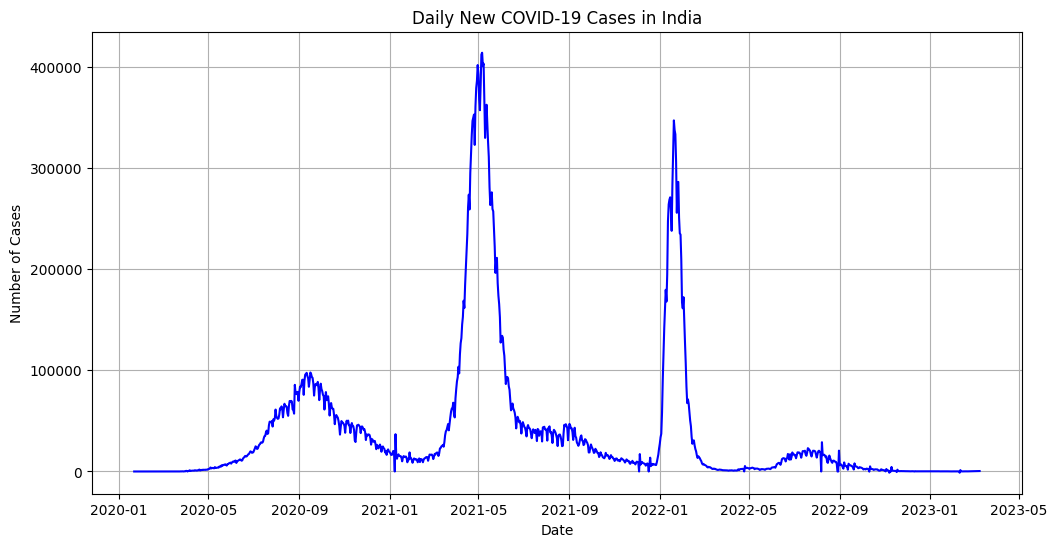

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(india_total_cases['Date'], india_total_cases['DailyNewCases'], color='blue')
plt.title('Daily New COVID-19 Cases in India')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.show()


In [14]:
#Step 6: Smooth daily new cases with a Moving Average
#Daily cases can be very noisy due to reporting delays or spikes. A common way to smooth this is by calculating a 7-day moving average, which averages daily cases over the last 7 days.
# Calculate 7-day moving average of daily new cases
india_total_cases['7Day_MA'] = india_total_cases['DailyNewCases'].rolling(window=7).mean()

# Show first 15 rows to see the difference
india_total_cases.head(15)


,Date,TotalConfirmedCases,DailyNewCases,7Day_MA
0,2020-01-22,0,0.0,NaN
1,2020-01-23,0,0.0,NaN
2,2020-01-24,0,0.0,NaN
3,2020-01-25,0,0.0,NaN
4,2020-01-26,0,0.0,NaN
5,2020-01-27,0,0.0,NaN
6,2020-01-28,0,0.0,0.000000
7,2020-01-29,0,0.0,0.000000
8,2020-01-30,1,1.0,0.142857
9,2020-01-31,1,0.0,0.142857


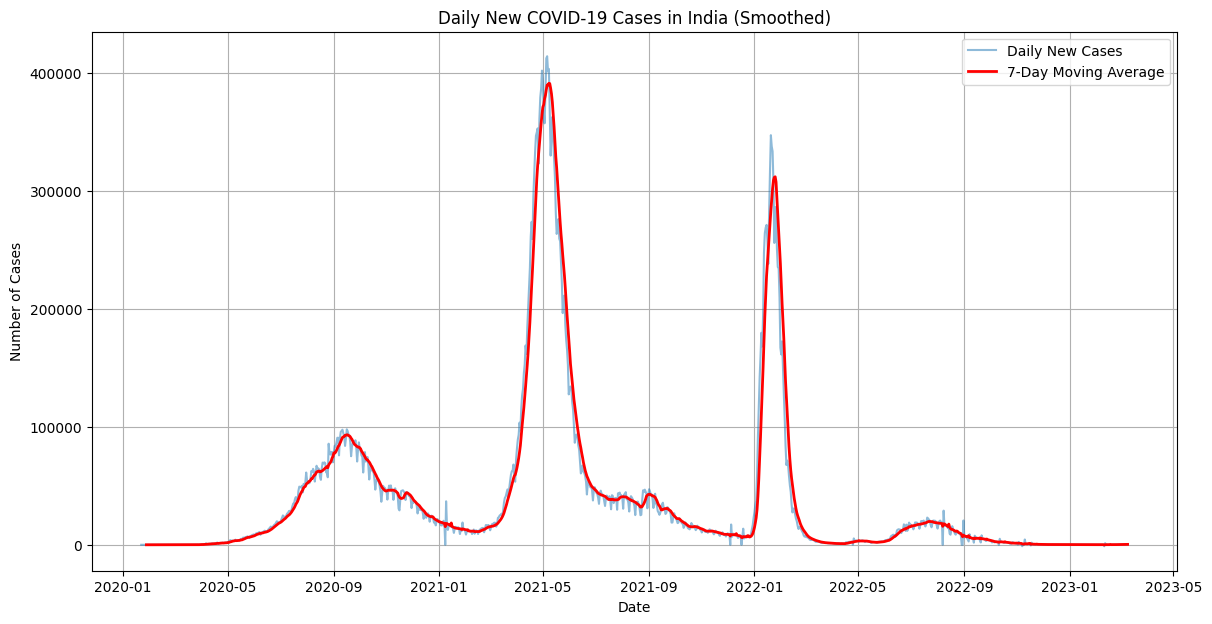

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))
plt.plot(india_total_cases['Date'], india_total_cases['DailyNewCases'], label='Daily New Cases', alpha=0.5)
plt.plot(india_total_cases['Date'], india_total_cases['7Day_MA'], label='7-Day Moving Average', color='red', linewidth=2)
plt.title('Daily New COVID-19 Cases in India (Smoothed)')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
#Step 7: Analyze key insights from the data Now that we have the trend, it’s useful to:Identify major peaks (waves) of COVID-19 cases in India — when the cases spiked highest.

#Find the dates of those peaks — helps understand waves.

#Calculate total cases till date and basic statistics.
# Find max daily new cases and the corresponding date
max_cases = india_total_cases['DailyNewCases'].max()
peak_date = india_total_cases.loc[india_total_cases['DailyNewCases'].idxmax(), 'Date']

print(f"Highest daily new cases: {int(max_cases)} on {peak_date.date()}")
total_cases = india_total_cases['TotalConfirmedCases'].iloc[-1]
print(f"Total confirmed COVID-19 cases in India till {india_total_cases['Date'].iloc[-1].date()}: {int(total_cases)}")


Highest daily new cases: 414188 on 2021-05-06
Total confirmed COVID-19 cases in India till 2023-03-09: 44690738


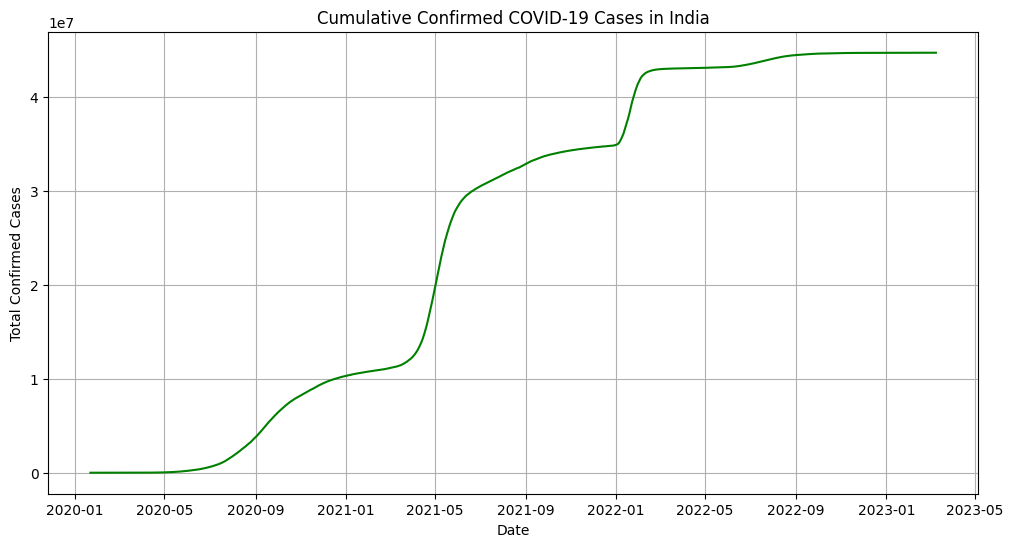

In [18]:
#Step 8: Visualize cumulative confirmed cases over time
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(india_total_cases['Date'], india_total_cases['TotalConfirmedCases'], color='green')
plt.title('Cumulative Confirmed COVID-19 Cases in India')
plt.xlabel('Date')
plt.ylabel('Total Confirmed Cases')
plt.grid(True)
plt.show()


In [19]:
#Step 9: Load and prepare India COVID-19 death data
import pandas as pd

# Load deaths data
url_deaths = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
deaths_df = pd.read_csv(url_deaths)

# Filter India data
india_deaths = deaths_df[deaths_df['Country/Region'] == 'India']

# Sum across states/provinces if multiple rows exist
date_cols = india_deaths.columns[4:]
india_total_deaths = india_deaths[date_cols].sum()

# Convert to DataFrame
india_total_deaths = india_total_deaths.reset_index()
india_total_deaths.columns = ['Date', 'TotalDeaths']

# Convert 'Date' to datetime
india_total_deaths['Date'] = pd.to_datetime(india_total_deaths['Date'], format='%m/%d/%y')

# Calculate daily new deaths
india_total_deaths['DailyNewDeaths'] = india_total_deaths['TotalDeaths'].diff().fillna(0)

india_total_deaths.head()


,Date,TotalDeaths,DailyNewDeaths
0,2020-01-22,0,0.0
1,2020-01-23,0,0.0
2,2020-01-24,0,0.0
3,2020-01-25,0,0.0
4,2020-01-26,0,0.0


In [20]:
#Step 10: Combine cases and deaths data, then plot
# Merge on Date
india_covid = pd.merge(india_total_cases, india_total_deaths[['Date', 'DailyNewDeaths']], on='Date')

# Check merged data
india_covid.head()


,Date,TotalConfirmedCases,DailyNewCases,7Day_MA,DailyNewDeaths
0,2020-01-22,0,0.0,NaN,0.0
1,2020-01-23,0,0.0,NaN,0.0
2,2020-01-24,0,0.0,NaN,0.0
3,2020-01-25,0,0.0,NaN,0.0
4,2020-01-26,0,0.0,NaN,0.0


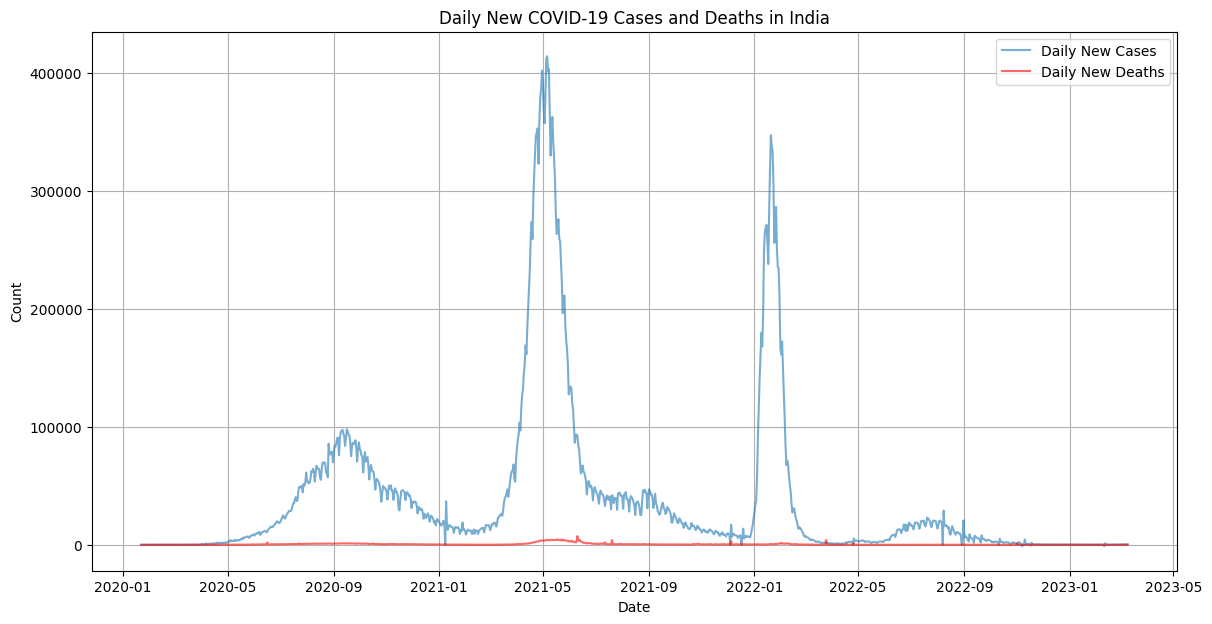

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))
plt.plot(india_covid['Date'], india_covid['DailyNewCases'], label='Daily New Cases', alpha=0.6)
plt.plot(india_covid['Date'], india_covid['DailyNewDeaths'], label='Daily New Deaths', alpha=0.6, color='red')
plt.title('Daily New COVID-19 Cases and Deaths in India')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()


In [22]:
#Step 11: Calculate monthly total new cases and deaths
#Grouping daily data by month helps understand big trends without daily noise.
# Add month-year column for grouping
india_covid['MonthYear'] = india_covid['Date'].dt.to_period('M')

# Group by month-year and sum daily new cases and deaths
monthly_summary = india_covid.groupby('MonthYear').agg({
    'DailyNewCases': 'sum',
    'DailyNewDeaths': 'sum'
}).reset_index()

# Convert MonthYear back to string for plotting
monthly_summary['MonthYear'] = monthly_summary['MonthYear'].astype(str)

monthly_summary.head()


,MonthYear,DailyNewCases,DailyNewDeaths
0,2020-01,1.0,0.0
1,2020-02,2.0,0.0
2,2020-03,1394.0,35.0
3,2020-04,33466.0,1119.0
4,2020-05,155746.0,4254.0


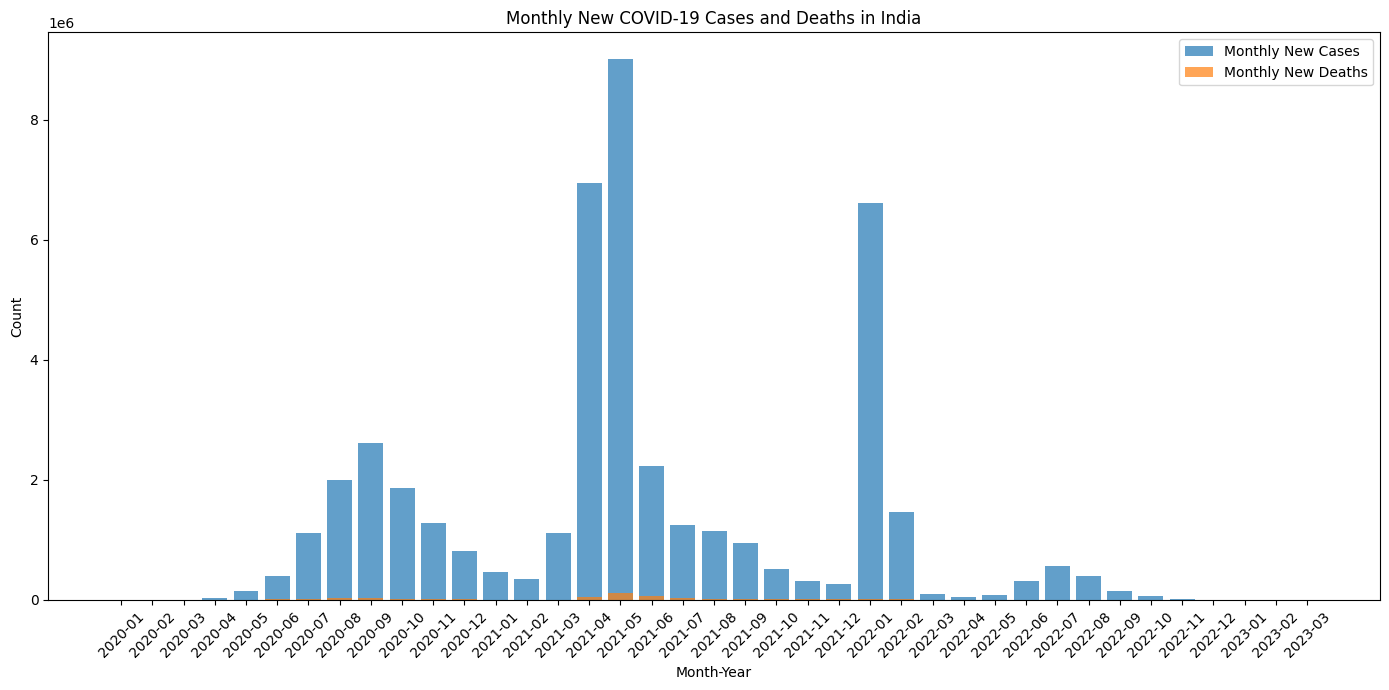

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))
plt.bar(monthly_summary['MonthYear'], monthly_summary['DailyNewCases'], label='Monthly New Cases', alpha=0.7)
plt.bar(monthly_summary['MonthYear'], monthly_summary['DailyNewDeaths'], label='Monthly New Deaths', alpha=0.7)
plt.xticks(rotation=45)
plt.title('Monthly New COVID-19 Cases and Deaths in India')
plt.xlabel('Month-Year')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()


In [25]:
#Step 12: Load and prepare India COVID-19 vaccination data
# Load vaccination data
url_vax = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv"
vax_df = pd.read_csv(url_vax)

# Filter for India
india_vax.loc[:, 'date'] = pd.to_datetime(india_vax['date'])


# Convert date column to datetime
india_vax['date'] = pd.to_datetime(india_vax['date'])

# Select relevant columns
india_vax = india_vax[['date', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'daily_vaccinations']]

india_vax.head()


,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations
81779,2021-01-15,0.0,0.0,NaN,NaN
81780,2021-01-16,191181.0,191181.0,NaN,191181.0
81781,2021-01-17,224301.0,224301.0,NaN,112150.0
81782,2021-01-18,454049.0,454049.0,NaN,151350.0
81783,2021-01-19,674835.0,674835.0,NaN,168709.0


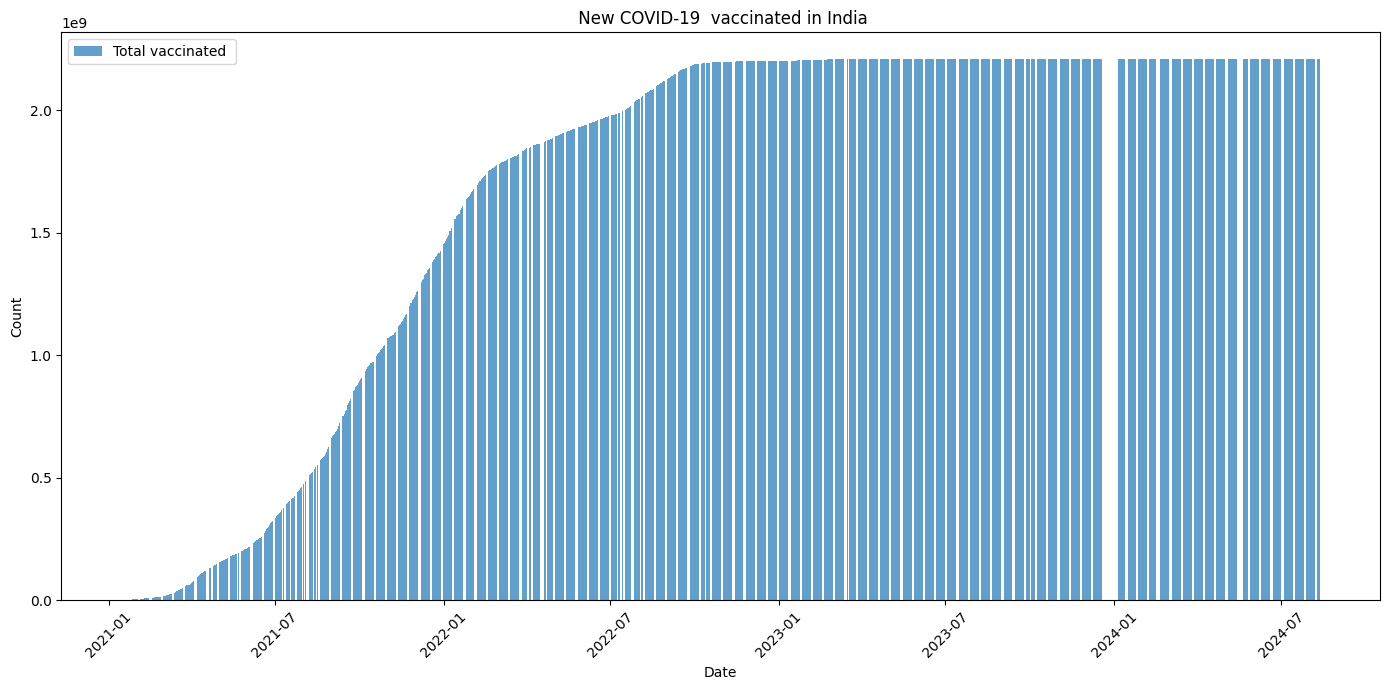

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))
plt.bar(india_vax['date'], india_vax['total_vaccinations'], label='Total vaccinated ', alpha=0.7)

plt.xticks(rotation=45)
plt.title(' New COVID-19  vaccinated in India')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

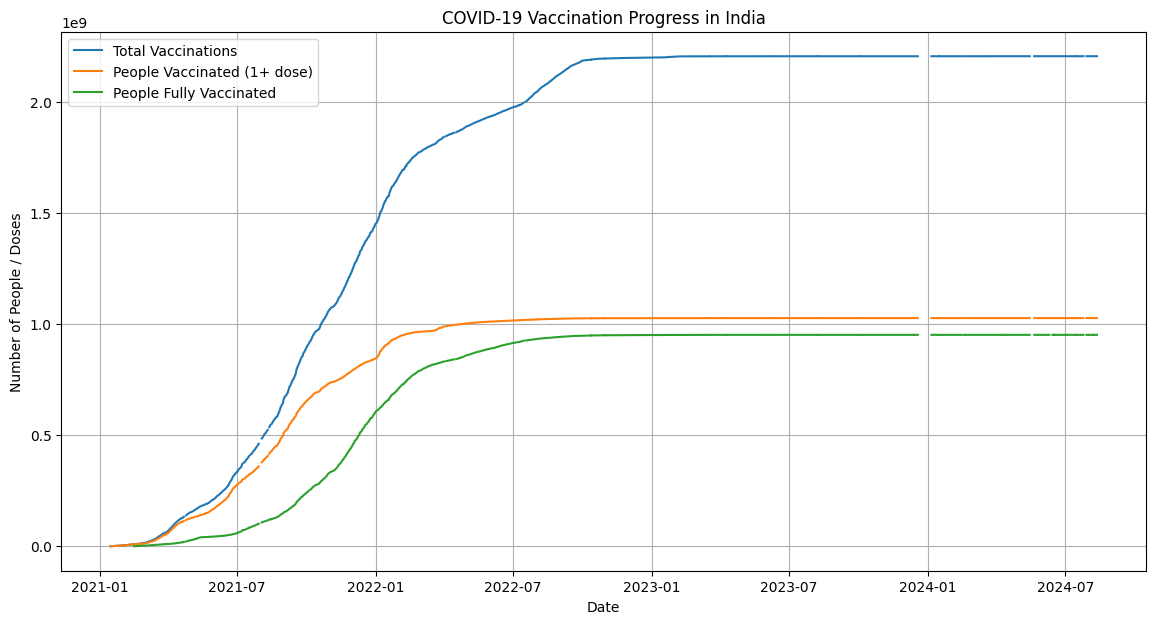

In [27]:
#Step 13: Plot vaccination data
#We will plot these three lines over time:

#Total vaccinations (cumulative doses given)

#People vaccinated (at least one dose)

#People fully vaccinated (all required doses)

plt.figure(figsize=(14,7))
plt.plot(india_vax['date'], india_vax['total_vaccinations'], label='Total Vaccinations')
plt.plot(india_vax['date'], india_vax['people_vaccinated'], label='People Vaccinated (1+ dose)')
plt.plot(india_vax['date'], india_vax['people_fully_vaccinated'], label='People Fully Vaccinated')
plt.title('COVID-19 Vaccination Progress in India')
plt.xlabel('Date')
plt.ylabel('Number of People / Doses')
plt.legend()
plt.grid(True)
plt.show()


In [28]:
#Step 14: Merge vaccination data with cases data
# Rename date column in india_vax to 'Date' for merging
india_vax.rename(columns={'date': 'Date'}, inplace=True)

# Merge india_covid and india_vax on 'Date' using outer join to keep all dates
combined_df = pd.merge(india_covid, india_vax, on='Date', how='outer')

# Fill missing vaccination data with 0 (for dates before vaccination started)
combined_df[['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'daily_vaccinations']] = combined_df[['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'daily_vaccinations']].fillna(0)

combined_df.head()


,Date,TotalConfirmedCases,DailyNewCases,7Day_MA,DailyNewDeaths,MonthYear,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations
0,2020-01-22,0.0,0.0,NaN,0.0,2020-01,0.0,0.0,0.0,0.0
1,2020-01-23,0.0,0.0,NaN,0.0,2020-01,0.0,0.0,0.0,0.0
2,2020-01-24,0.0,0.0,NaN,0.0,2020-01,0.0,0.0,0.0,0.0
3,2020-01-25,0.0,0.0,NaN,0.0,2020-01,0.0,0.0,0.0,0.0
4,2020-01-26,0.0,0.0,NaN,0.0,2020-01,0.0,0.0,0.0,0.0


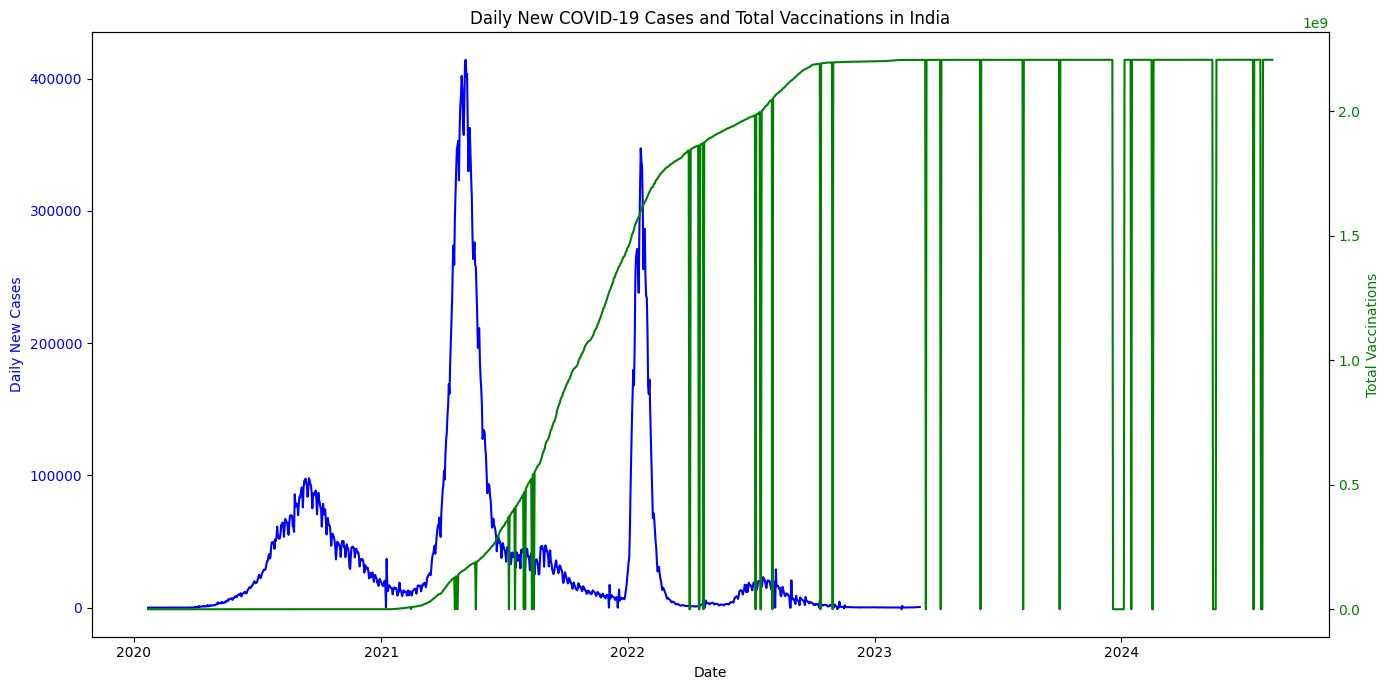

In [29]:
#Step 15: Plot daily new cases and total vaccinations on the same plot with two y-axes
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(14,7))

ax1.set_xlabel('Date')
ax1.set_ylabel('Daily New Cases', color='blue')
ax1.plot(combined_df['Date'], combined_df['DailyNewCases'], color='blue', label='Daily New Cases')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Total Vaccinations', color='green')
ax2.plot(combined_df['Date'], combined_df['total_vaccinations'], color='green', label='Total Vaccinations')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Daily New COVID-19 Cases and Total Vaccinations in India')
fig.tight_layout()
plt.show()


   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
   - -------------------------------------- 0.5/13.3 MB 736.5 kB/s eta 0:00:18
   -- ------------------------------------- 0.8/13.3 MB 821.1 kB/s eta 0:00:16
   -- ------------------------------------- 0.8/13.3 MB 821.1 kB/s eta 0:00:16
   --- ------------------------------------ 1.0/13.3 MB 845.4 kB/s eta 0:00:15
   --- ------------------------------------ 1.0/13.3 MB 845.4 kB/s eta 0:00:15
   --- ------------------------------------ 1.3/13.3 MB 763.6 kB/s eta 0:00:16
   --- ------------------------------------ 1.3/13.3 MB 763.6 kB/s eta 0:00:16
   ---- ----------------------------------- 1.6/13.3 MB 728.1 kB/s eta 0:00:17
   ------ --------------------------------- 2.1/13.3 MB 856.1 kB/s eta 0:00:14
   ------

09:28:27 - cmdstanpy - INFO - Chain [1] start processing
09:28:27 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\user\AppData\Local\Temp\ipykernel_12404\2632120911.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig1.show()


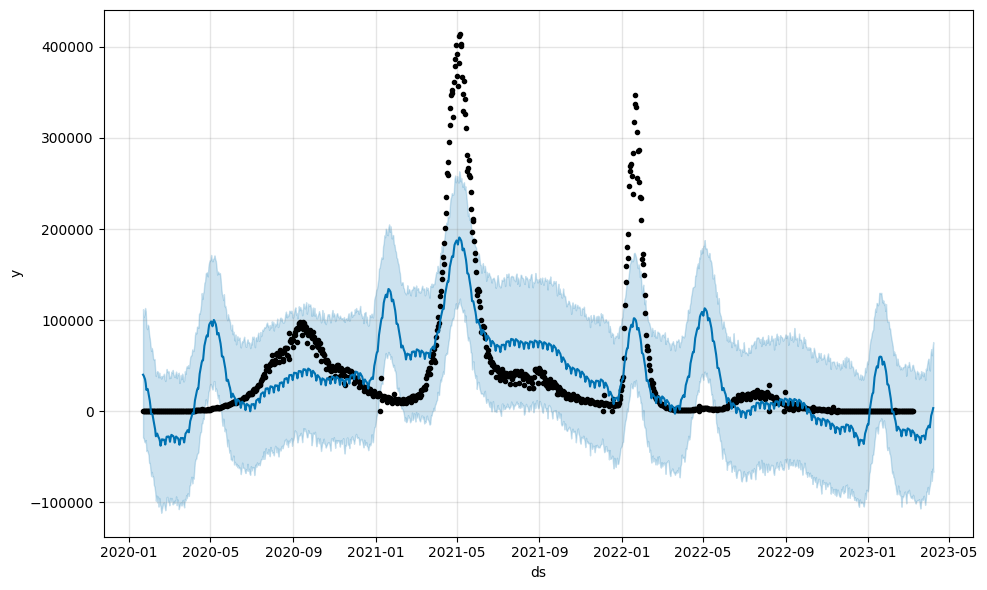

In [30]:

#predicting future COVID-19 cases using a simple but effective method: time series forecasting with Facebook Prophet
#Step 1 for forecasting: Install Prophet (if not installed)
!pip install prophet


In [31]:

#Step 2: Prepare data for Prophet
#Prophet expects data in a specific format: two columns —

#ds (date) and y (value to predict)
# Prepare dataframe for Prophet
prophet_df = india_total_cases[['Date', 'DailyNewCases']].rename(columns={'Date': 'ds', 'DailyNewCases': 'y'})

# Check the first few rows
prophet_df.head()


,ds,y
0,2020-01-22,0.0
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-25,0.0
4,2020-01-26,0.0


09:44:47 - cmdstanpy - INFO - Chain [1] start processing
09:44:48 - cmdstanpy - INFO - Chain [1] done processing


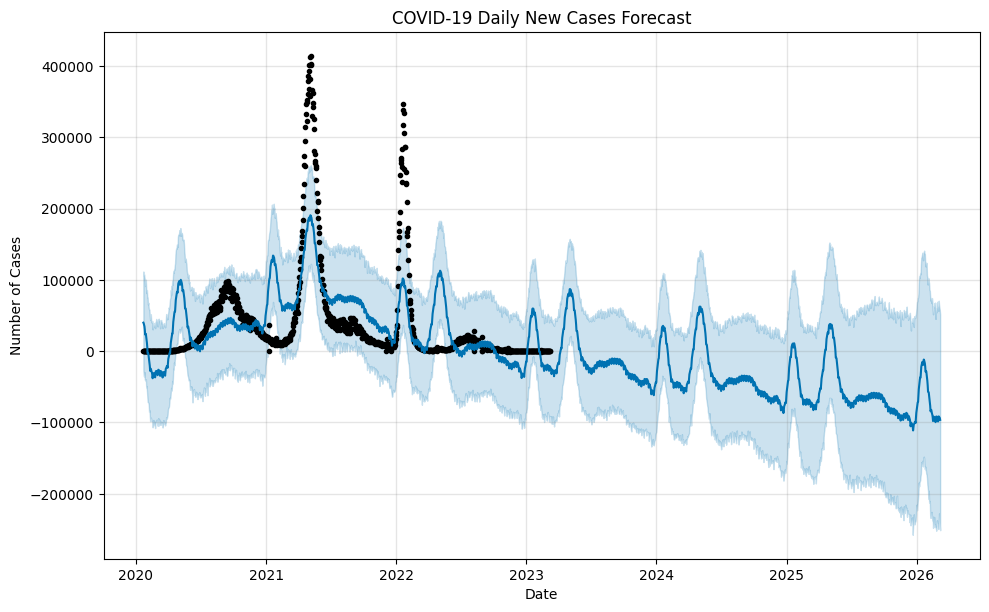

In [48]:
#Step 3: Train Prophet model and forecast next 30 days
from prophet import Prophet

# Initialize and train the model
model = Prophet()
model.fit(prophet_df)

# Create future dataframe for next 30 days
 
future = model.make_future_dataframe(periods=365*3)  # forecast 50 year ahead
 
# Predict future cases
forecast = model.predict(future)

# Show forecast columns
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

#Step 4: Plot forecast
 
fig1 = model.plot(forecast)

plt.title("COVID-19 Daily New Cases Forecast")
plt.xlabel("Date")
plt.ylabel("Number of Cases")

plt.show()



In [44]:
forecast = model.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend' ]].head())


          ds          yhat    yhat_lower     yhat_upper         trend
0 2020-01-22  40013.698472 -37496.214931  106688.194237 -18006.160599
1 2020-01-23  38850.627044 -24407.280373  112639.741728 -17749.056844
2 2020-01-24  36960.762049 -27764.732682  107441.859158 -17491.953088
3 2020-01-25  34952.104192 -32364.461417  110848.726265 -17234.849333
4 2020-01-26  30557.189323 -40952.498871   97703.167964 -16977.745577


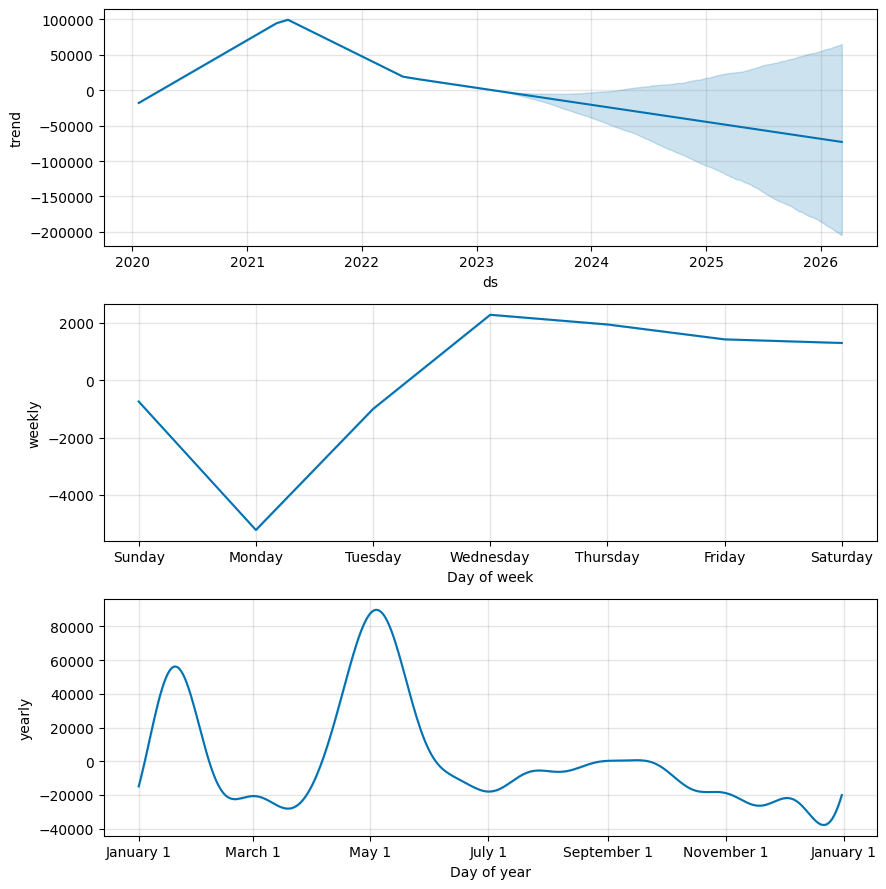

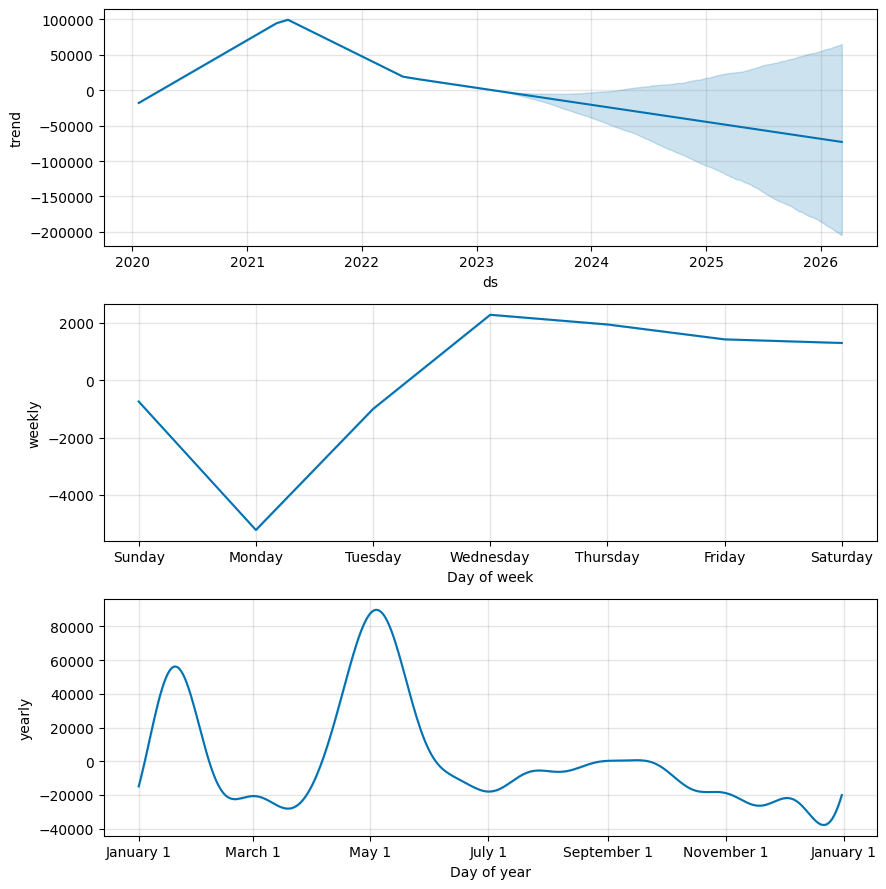

In [49]:
future = model.make_future_dataframe(periods=365)
model.plot_components(forecast)


In [54]:
print(df.head())
print(df.columns)


  Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  \
0        0        0        0        0  ...   209322  209340  209358  209362   
1        0        0        0        0  ...   334391  334408  334408  334427   
2        0        0        0        0  ...   271441  271448  271463  271469   
3        0        0        0        0  ...    47866   47875   47875   47875   
4        0        0        0        0  ...   105255  105277  105277  105277   

   3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0  209369  209390  209406  2

In [57]:
 
# Step 1: ধরো তোমার ডেটাফ্রেমের নাম df
 

df_cases = df.drop(columns=['Province/State', 'Lat', 'Long'])  # যদি State/Lat/Long দরকার না

# Step 2: Data কে long format এ রূপান্তর করো
df_long = df_cases.melt(id_vars=['Country/Region'], var_name='ds', value_name='y')

# Step 3: ds কলামকে datetime এ রূপান্তর করো
df_long['ds'] = pd.to_datetime(df_long['ds'], format='%m/%d/%y')


# Step 4: (Optional) নির্দিষ্ট দেশের ডেটা নাও, যেমন India
df_india = df_long[df_long['Country/Region'] == 'India']

# এখন ডেটাফ্রেম df_india এর দুইটা কলাম: ds (তারিখ), y (মান)
print(df_india.head())


     Country/Region         ds  y
148           India 2020-01-22  0
437           India 2020-01-23  0
726           India 2020-01-24  0
1015          India 2020-01-25  0
1304          India 2020-01-26  0


In [58]:
 

model = Prophet(interval_width=0.95)
model.fit(df_india[['ds', 'y']])


09:50:33 - cmdstanpy - INFO - Chain [1] start processing
09:50:34 - cmdstanpy - INFO - Chain [1] done processing


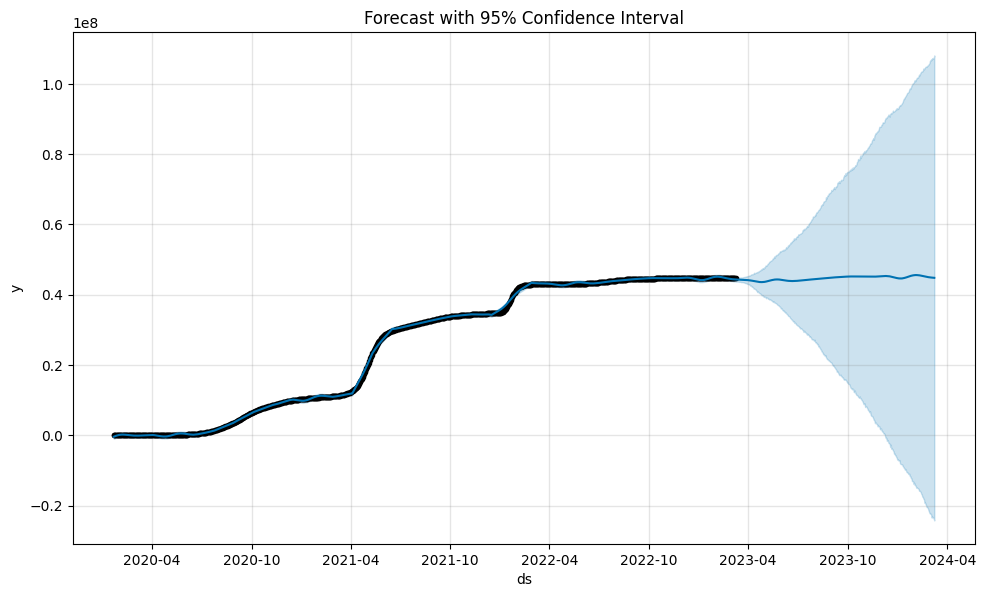

In [63]:
future = model.make_future_dataframe(periods= 365  )
forecast = model.predict(future)

fig1 = model.plot(forecast)
plt.title("Forecast with 95% Confidence Interval")
plt.show()